In [1]:
import matplotlib.pyplot as plt
import numpy as np

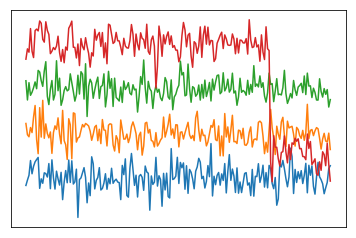

In [2]:
X = np.random.normal(0, 1, size=(200, 4))
for i in range(4):
    X[:, i] += 4 * (i+1)
X[160:, 3] -= 10
plt.figure()
plt.plot(X)
plt.xticks([])
plt.yticks([])
plt.show()